In [ ]:
# Installing Libraries
# !pip install cv2
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install keras
# !pip install sklearn

In [ ]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [ ]:
# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


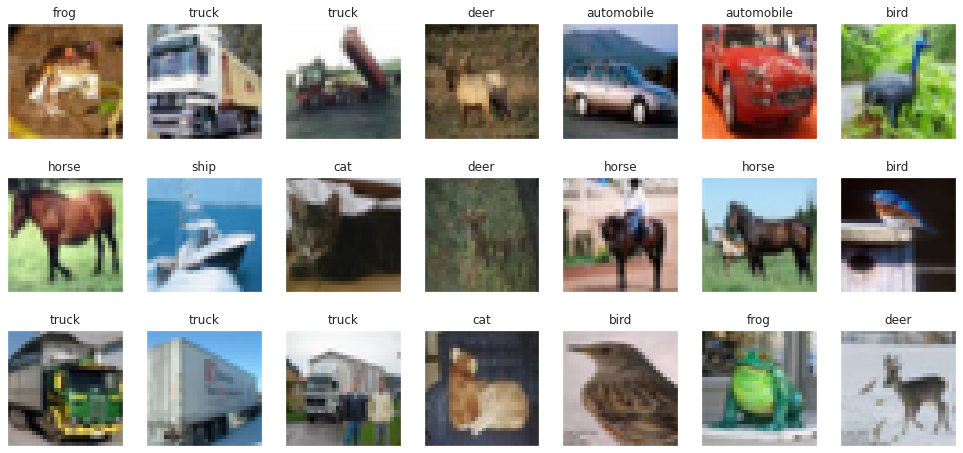

In [ ]:
# Display the first 21 images of X_train
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

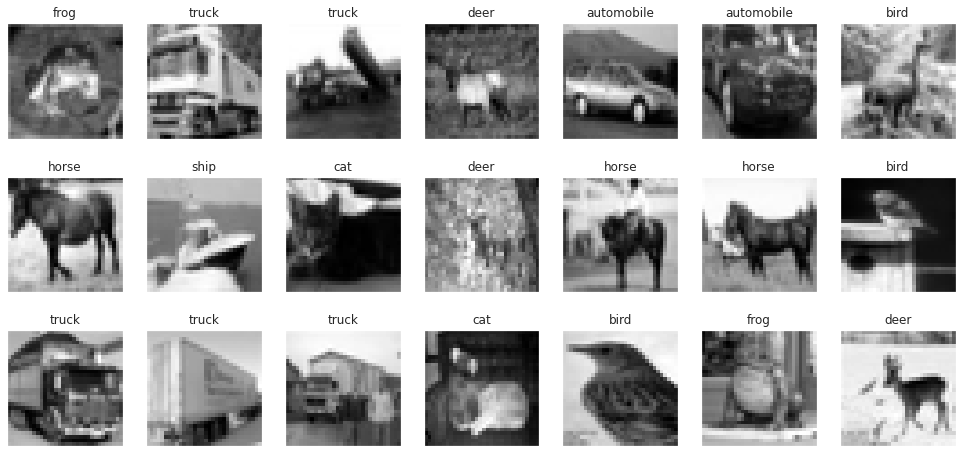

In [ ]:
# Display the first 21 images of X_train (grayscale)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
# Value normalization
X_train  = X_train/255
X_test  = X_test/255

In [ ]:
# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_encoder.fit(y_train)

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [ ]:
# Defining input shape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# Constructing CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 346s 221ms/step - loss: 2.0247 - acc: 0.2345 - val_loss: 1.4036 - val_acc: 0.4878
Epoch 2/20
1563/1563 [==============================] - 351s 225ms/step - loss: 1.3793 - acc: 0.5005 - val_loss: 1.1735 - val_acc: 0.5733
Epoch 3/20
1563/1563 [==============================] - 346s 221ms/step - loss: 1.1388 - acc: 0.5951 - val_loss: 1.0290 - val_acc: 0.6452
Epoch 4/20
1563/1563 [==============================] - 346s 221ms/step - loss: 1.0198 - acc: 0.6429 - val_loss: 0.9757 - val_acc: 0.6632
Epoch 5/20
1563/1563 [==============================] - 346s 222ms/step - loss: 0.9159 - acc: 0.6821 - val_loss: 0.9212 - val_acc: 0.6820
Epoch 6/20
1563/1563 [==============================] - 350s 224ms/step - loss: 0.8434 - acc: 0.7065 - val_loss: 0.9152 - val_acc: 0.6876
Epoch 7/20
1563/1563 [==============================] - 345s 221ms/step - loss: 0.7864 - acc: 0.7274 - val_loss: 0.8664 - val_acc: 0.7036
Epoch 8/20
1563/1563 [============

In [ ]:
# Saving/loading model
model.save('CNN_CIFAR.h5')
model = load_model('CNN_CIFAR.h5')

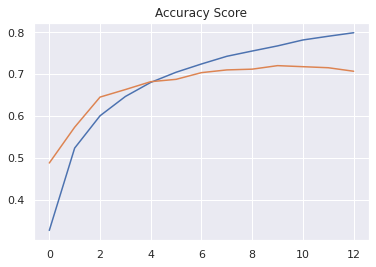

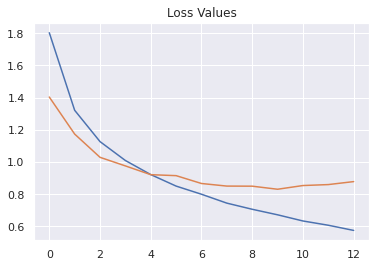

In [ ]:
# Model evaluation
plt.title('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# Predicting test data
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

y_test = one_hot_encoder.inverse_transform(y_test)

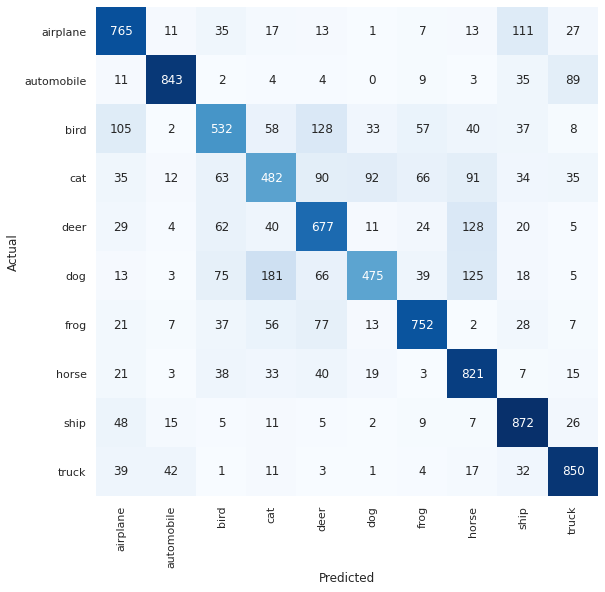

In [ ]:
# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

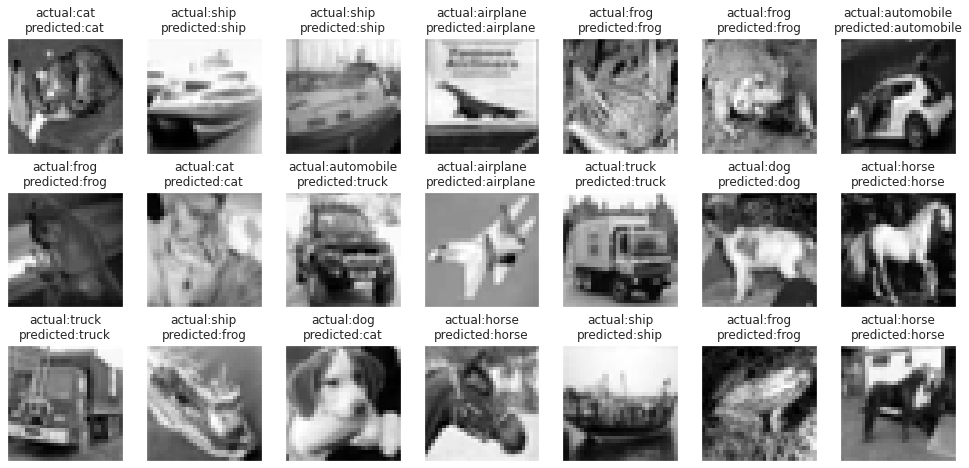

In [ ]:
# Displaying test data with its actual and predicted label
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()